In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/clicks-conversion-tracking/KAG_conversion_data.csv


Data:

The data used in this project is from an anonymous organisation’s social media ad campaign.

1.) ad_id: an unique ID for each ad.

2.) xyzcampaignid: an ID associated with each ad campaign of XYZ company.

3.) fbcampaignid: an ID associated with how Facebook tracks each campaign.

4.) age: age of the person to whom the ad is shown.

5.) gender: gender of the person to whim the add is shown

6.) interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

7.) Impressions: the number of times the ad was shown.

8.) Clicks: number of clicks on for that ad.

9.) Spent: Amount paid by company xyz to Facebook, to show that ad.

10.) Total conversion: Total number of people who enquired about the product after seeing the ad.

11.) Approved conversion: Total number of people who bought the product after seeing the ad.

Aim:

To optimize Sales conversion and predict future sales






In [2]:
df=pd.read_csv("/kaggle/input/clicks-conversion-tracking/KAG_conversion_data.csv")

Exploratory Data Analysis

In [3]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [4]:
df.shape

(1143, 11)

In [5]:
df.info()
# no null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [6]:
df.describe()


,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [7]:
df.describe(include=['object'])

,age,gender
count,1143,1143
unique,4,2
top,30-34,M
freq,426,592


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df.corr()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
ad_id,1.000000,0.929892,0.972002,0.456483,0.462308,0.431981,0.433053,0.346539,0.271331
xyz_campaign_id,0.929892,1.000000,0.872392,0.272282,0.495273,0.469729,0.476689,0.346684,0.284968
fb_campaign_id,0.972002,0.872392,1.000000,0.595753,0.439439,0.406978,0.403532,0.344170,0.257658
interest,0.456483,0.272282,0.595753,1.000000,0.101973,0.088706,0.070226,0.120270,0.058353
Impressions,0.462308,0.495273,0.439439,0.101973,1.000000,0.948514,0.970386,0.812838,0.684249
Clicks,0.431981,0.469729,0.406978,0.088706,0.948514,1.000000,0.992906,0.694632,0.559526
Spent,0.433053,0.476689,0.403532,0.070226,0.970386,0.992906,1.000000,0.725379,0.593178
Total_Conversion,0.346539,0.346684,0.344170,0.120270,0.812838,0.694632,0.725379,1.000000,0.864034
Approved_Conversion,0.271331,0.284968,0.257658,0.058353,0.684249,0.559526,0.593178,0.864034,1.000000


Visualizing the correlation data ( including only the quantitative variables)

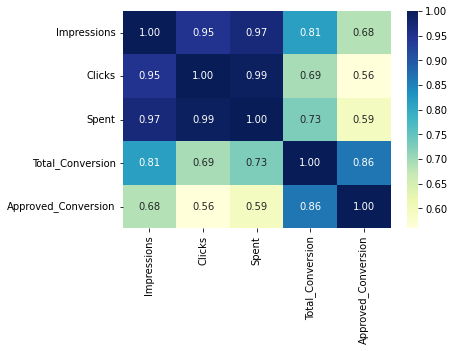

In [10]:
g=sns.heatmap(df[["Impressions","Clicks","Spent","Total_Conversion","Approved_Conversion"]].corr(),annot=True ,fmt=".2f", cmap="YlGnBu")

impressions and clicks are high corr,
impression and spent are high corr,
impression and total_conversion are high corr,
impression and approved_conv are medium correlated,
clicks and spent are high corr,
clicks and total conv and approved conv are medium correlated,
spent and total_conv and spent are moderately correlated,
spent and approved conv are moderately correlated,
total conv and approved conversion are highly correlated.


The more the add is shown the higher the total conv and approved conv

In [11]:
# 3 unique campaigns run by xyz company
df['xyz_campaign_id'].unique()

array([ 916,  936, 1178])

In [12]:
# renaming the campaigns for analysis purpose
df['xyz_campaign_id'].replace({916:'campaign_1',936:'campaign_2',1178:'campaign_3'}, inplace=True)


In [13]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,campaign_1,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,campaign_1,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,campaign_1,103920,30-34,M,20,693,0,0.00,1,0
3,708815,campaign_1,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,campaign_1,103928,30-34,M,28,4133,1,1.29,1,1


In [14]:
df['fb_campaign_id'].nunique()
# number of FB campaigns

691

In [15]:
df['ad_id'].nunique()
# number of adds in the data

1143

<AxesSubplot:xlabel='xyz_campaign_id', ylabel='count'>

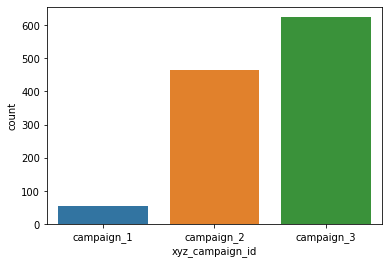

In [16]:
sns.countplot(x='xyz_campaign_id', data=df)
# we can see that maximum adds were shown to campaign_3

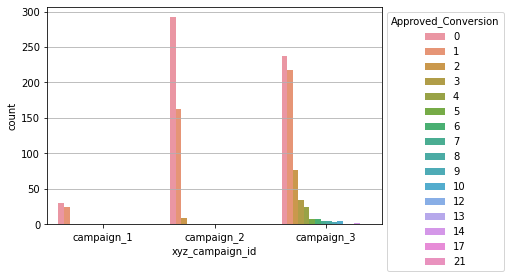

In [17]:
ax=sns.countplot(x ='xyz_campaign_id',hue="Approved_Conversion", data = df) 
plt.grid(axis='y')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# campaign_3 has maximum approved conversions


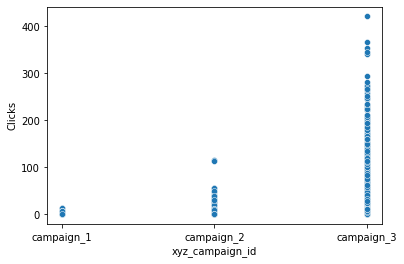

In [18]:
ax=sns.scatterplot(x ='xyz_campaign_id',y="Clicks", data = df) 
# campaign_3 clicks are more

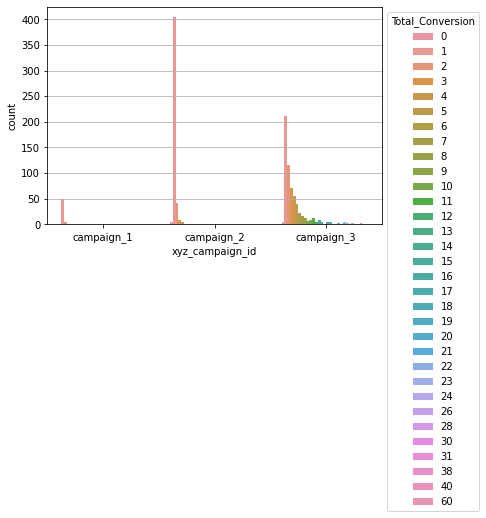

In [19]:
ax=sns.countplot(x ='xyz_campaign_id',hue="Total_Conversion", data = df) 
plt.grid(axis='y')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

distribution of conversions for campaigns over gender 

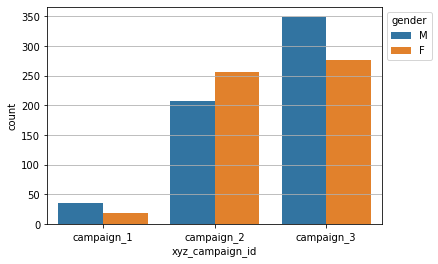

In [20]:
ax=sns.countplot(x ='xyz_campaign_id',hue="gender", data = df) 
plt.grid(axis='y')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

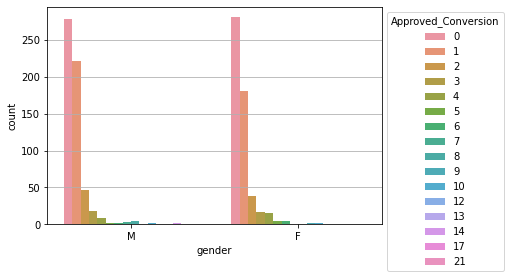

In [21]:
ax=sns.countplot(hue ='Approved_Conversion',x="gender", data = df) 
plt.grid(axis='y')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

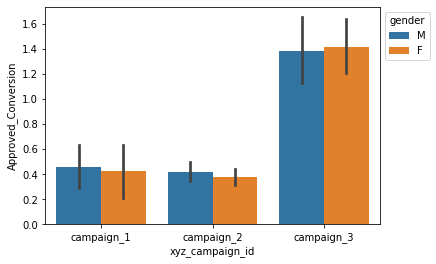

In [22]:
ax=sns.barplot(x ='xyz_campaign_id',y='Approved_Conversion',hue='gender', data = df) 
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# unlike campaign 1 and campaign 2 , campaign 3 has more females with conversions

Maximum ads shown to campaign_3, maximum conversions in campaign_3 and maximum conversions by Males

distribution of conversions with campaigns over age

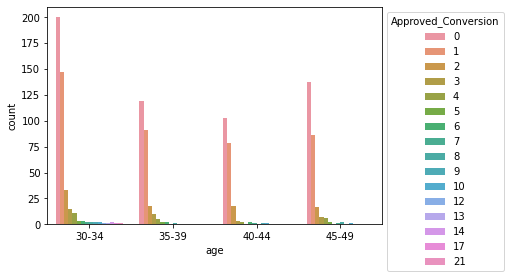

In [23]:
ax=sns.countplot(x='age',hue='Approved_Conversion', data=df)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# maximum users are in 30-34 age bracket and also maximum conversions are from same age group

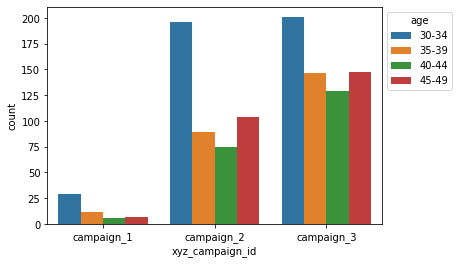

In [24]:
ax=sns.countplot(x='xyz_campaign_id',hue='age', data=df)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# maximum users are in 30-34 age, 45-49 age  bracket and also maximum conversions are from same age group
# maximum people /ads were in campaign 3 and so maximum conversions in 30-34 age bracket

<AxesSubplot:xlabel='xyz_campaign_id', ylabel='Approved_Conversion'>

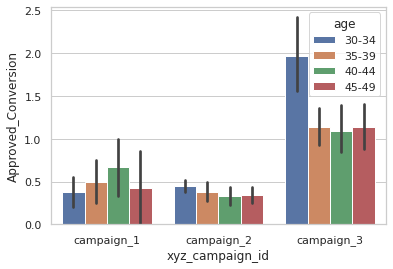

In [25]:
import seaborn as sns
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
sns.barplot(x=df["xyz_campaign_id"], y=df["Approved_Conversion"], hue=df["age"], data=tips)

# distribution of conversions in each campaign by age
# campaign_1 has most conversions for age group 40-44 and least for 30-34. 

#In other 2 campaigns it is reverse trend. Maximum for 30-34 and minimum for 40-44.


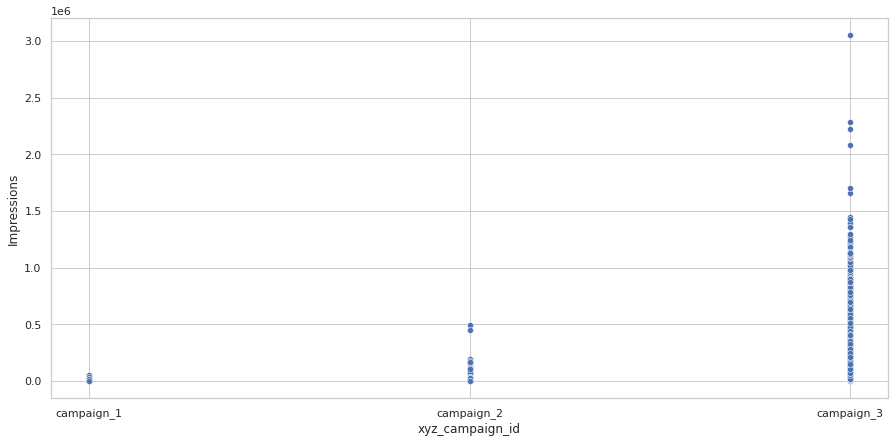

In [26]:
fig=plt.figure(figsize=(15,7))

sns.scatterplot(y='Impressions',x='xyz_campaign_id', data=df)


plt.show()

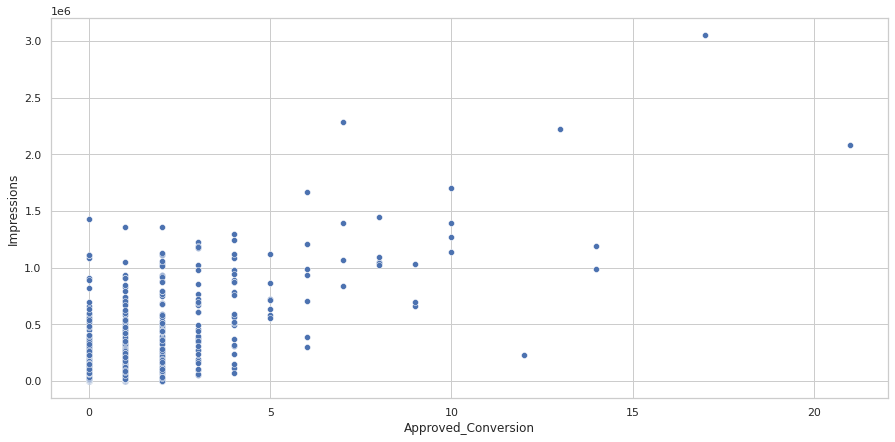

In [27]:
fig=plt.figure(figsize=(15,7))

sns.scatterplot(y='Impressions',x='Approved_Conversion', data=df)


plt.show()

higher Impressions drive higher conversions

In [28]:
df['Clicks'].groupby(by=df['xyz_campaign_id']).sum()

xyz_campaign_id
campaign_1      113
campaign_2     1984
campaign_3    36068
Name: Clicks, dtype: int64

In [29]:
df['Approved_Conversion'].groupby(by=df['xyz_campaign_id']).sum()

xyz_campaign_id
campaign_1     24
campaign_2    183
campaign_3    872
Name: Approved_Conversion, dtype: int64

In [30]:
df['Total_Conversion'].groupby(by=df['xyz_campaign_id']).sum()

xyz_campaign_id
campaign_1      58
campaign_2     537
campaign_3    2669
Name: Total_Conversion, dtype: int64

In [31]:
df['ad_id'].groupby(by=df['xyz_campaign_id']).count()

xyz_campaign_id
campaign_1     54
campaign_2    464
campaign_3    625
Name: ad_id, dtype: int64

In [32]:
df['Impressions'].groupby(by=df['xyz_campaign_id']).sum()

xyz_campaign_id
campaign_1       482925
campaign_2      8128187
campaign_3    204823716
Name: Impressions, dtype: int64

In [33]:
df['interest'].unique()

array([ 15,  16,  20,  28,  29,  27,  31,   7,  30,  24,  21,  32,  18,
        63,  65,  25,  10,  19,  26,  36,  23,  64,  22,   2,  66, 100,
       101, 102, 103, 105, 107, 110, 111, 112, 113, 108, 109, 114, 104,
       106])

In [34]:
df['interest'].where(df['xyz_campaign_id']=='campaign_3').value_counts()

16.0     38
10.0     35
29.0     35
27.0     26
63.0     26
28.0     26
64.0     24
20.0     24
19.0     23
22.0     22
21.0     22
32.0     21
18.0     20
15.0     20
25.0     19
2.0      18
26.0     18
23.0     17
24.0     16
30.0     16
31.0     15
7.0      14
36.0     13
65.0     11
66.0     11
107.0     8
110.0     8
102.0     7
105.0     7
101.0     7
112.0     7
108.0     7
100.0     6
111.0     6
113.0     6
109.0     6
103.0     5
114.0     5
104.0     5
106.0     5
Name: interest, dtype: int64

In [35]:
df['interest'].where(df['xyz_campaign_id']=='campaign_2').value_counts()

16.0    86
10.0    48
29.0    39
27.0    31
64.0    24
26.0    23
20.0    22
15.0    22
18.0    22
28.0    21
63.0    18
21.0    13
22.0    11
32.0    11
36.0     8
19.0     8
31.0     8
7.0      8
30.0     8
2.0      7
24.0     7
65.0     7
23.0     6
25.0     6
Name: interest, dtype: int64

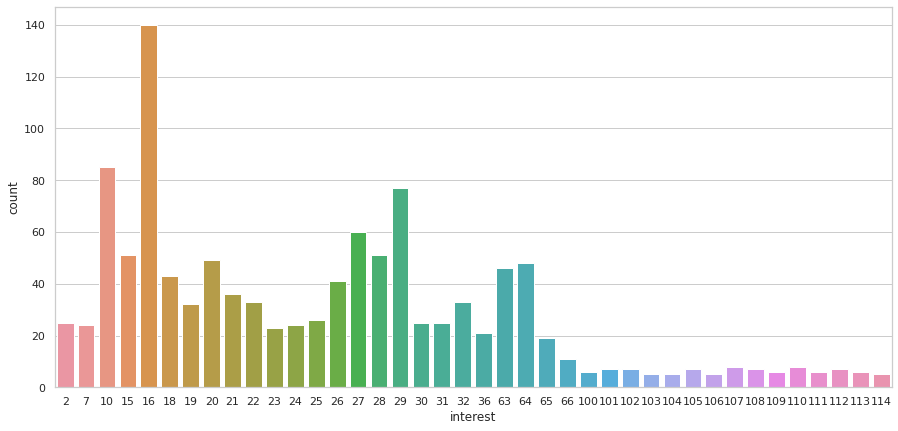

In [36]:
fig=plt.figure(figsize=(15,7))

sns.countplot(x='interest', data=df)


plt.show()

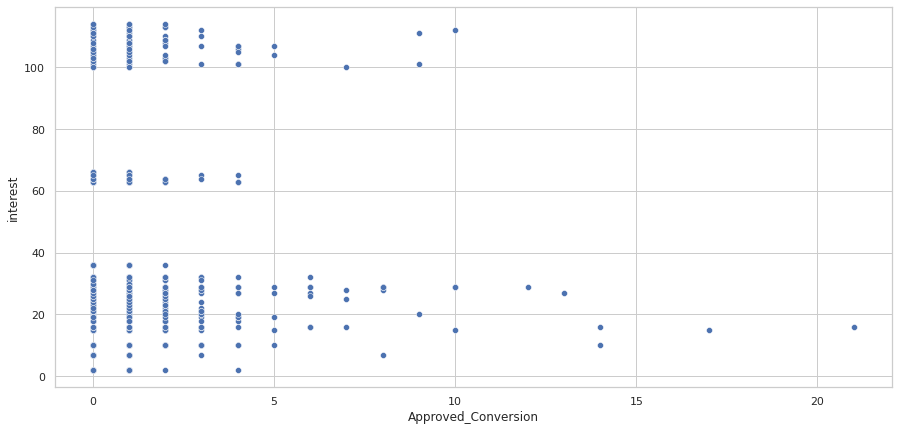

In [37]:
fig=plt.figure(figsize=(15,7))

sns.scatterplot(y='interest',x='Approved_Conversion', data=df)


plt.show()

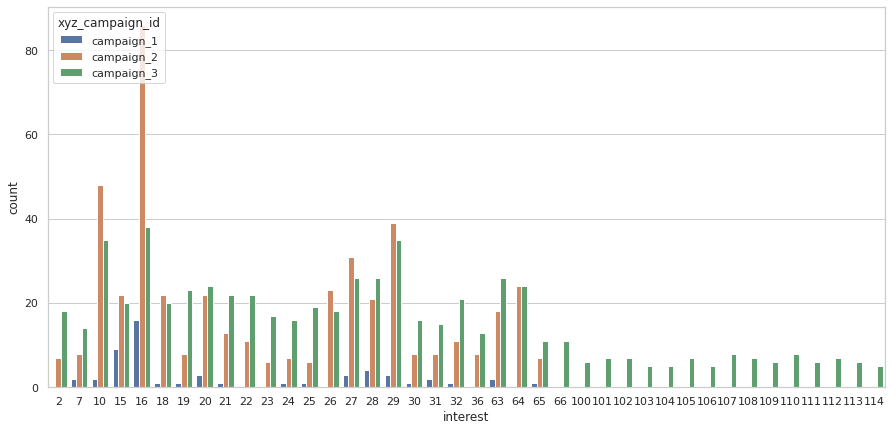

In [38]:
fig=plt.figure(figsize=(15,7))

sns.countplot(x='interest',hue='xyz_campaign_id', data=df)


plt.show()


Though there are more add campaigns with interest code ranging between 2-66 , there are still many conversions for ads with interest code beyond 66 code
When we compare the xyz campaign_3 with xyz campaign_2 we can see that campaign_3 has many adds with interests beyond code 66 and perhaps that is what driving the higher conversions as well.

In [39]:
#df['Impressions'].nunique()
x=list(df['Impressions'].sort_values().tail())
print(x)

[1705246, 2080666, 2223278, 2286228, 3052003]


In [40]:
#for i in x:
df2=df.where(df['Impressions']>=1705246)
    

In [41]:
df2.dropna()
# campaign_3 gets maximum/high impressions driving approved conversions

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
525,1121100.0,campaign_3,144532.0,30-34,M,15.0,3052003.0,340.0,639.949998,60.0,17.0
528,1121104.0,campaign_3,144533.0,30-34,M,16.0,2080666.0,202.0,360.150001,40.0,21.0
765,1121601.0,campaign_3,144624.0,45-49,M,16.0,2286228.0,353.0,603.380002,16.0,7.0
860,1121814.0,campaign_3,144659.0,30-34,F,27.0,2223278.0,421.0,612.300003,38.0,13.0
867,1121824.0,campaign_3,144661.0,30-34,F,29.0,1705246.0,295.0,429.479998,23.0,10.0


<AxesSubplot:xlabel='Spent', ylabel='xyz_campaign_id'>

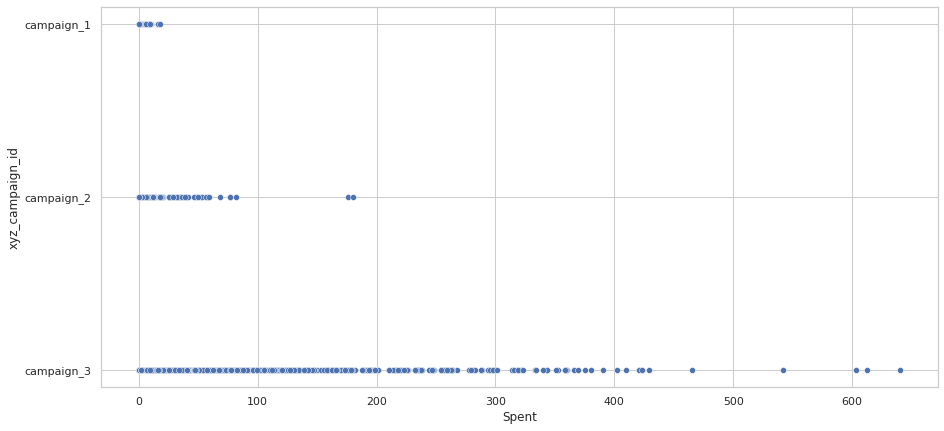

In [42]:
fig=plt.figure(figsize=(15,7))

sns.scatterplot(x='Spent', y='xyz_campaign_id', data=df)


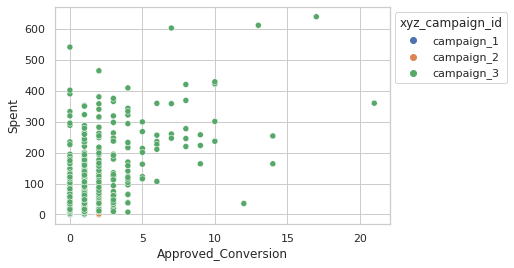

In [43]:
ax=sns.scatterplot(x='Approved_Conversion',y='Spent', hue='xyz_campaign_id', data=df)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# spent is higher for approved conversion ranging from 5 to upwards 

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

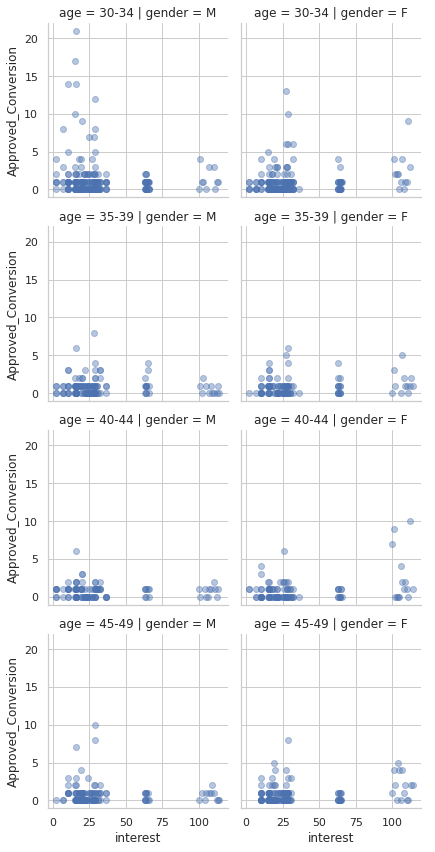

In [44]:
f = sns.FacetGrid(df, col="gender", row='age')
f.map(plt.scatter, "interest", "Approved_Conversion", alpha=.4)
f.add_legend();

High rate of conversion for Men in lowest age bracket.The conversions are most in 30-34 bracket and then in 45-49 age bracket.
Females conversions high for ads with code greater than 66

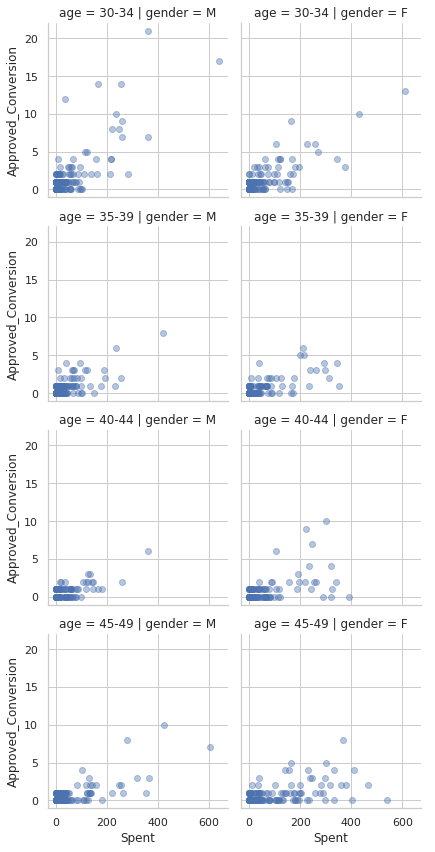

In [45]:
f = sns.FacetGrid(df, col="gender", row='age')
f.map(plt.scatter, "Spent", "Approved_Conversion", alpha=.4)
f.add_legend();

* Females have higher spending
* Males have higher conversions even with lower spending in age group 30-34 specially.
* Higher age bracket has higher spending

Conversion rate per ad, per campaign 

In [46]:
(df['Approved_Conversion'].groupby(by=df['xyz_campaign_id']).sum()/df['ad_id'].groupby(by=df['xyz_campaign_id']).count())*100

xyz_campaign_id
campaign_1     44.444444
campaign_2     39.439655
campaign_3    139.520000
dtype: float64

In [47]:
df['ad_id'].groupby(by=df['xyz_campaign_id']).count()

xyz_campaign_id
campaign_1     54
campaign_2    464
campaign_3    625
Name: ad_id, dtype: int64

conversion rate per campaign distributed by gender

In [48]:
(df['Approved_Conversion'].groupby([df['xyz_campaign_id'],df['gender']]).sum()/df['ad_id'].groupby(by=df['xyz_campaign_id']).count())*100

xyz_campaign_id  gender
campaign_1       F         14.814815
                 M         29.629630
campaign_2       F         20.689655
                 M         18.750000
campaign_3       F         62.560000
                 M         76.960000
dtype: float64

click per ad in each campaign

In [49]:
(df['Clicks'].groupby(by=df['xyz_campaign_id']).sum()/df['ad_id'].groupby(by=df['xyz_campaign_id']).count())*100

xyz_campaign_id
campaign_1     209.259259
campaign_2     427.586207
campaign_3    5770.880000
dtype: float64

Cost to conversion OR cost of acquisition for the ads in each campaign


In [50]:
df['Spent'].groupby(by=df['xyz_campaign_id']).sum()/df['Approved_Conversion'].groupby(by=df['xyz_campaign_id']).sum()

xyz_campaign_id
campaign_1     6.237917
campaign_2    15.810765
campaign_3    63.832741
dtype: float64

Between campaign_1 and campaign_2 the cost of conversion is lesser for campaign_1 while its conversion rate is higher. It is performing better than campaign_2. campaign_3 performs best in terms of conversions but cost highest also